In [2]:
# Importing Tensorflow and keras

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [4]:
train = pd.read_csv("C:/Users/PRATHAM/Desktop/Winter_projects/train.csv")
test = pd.read_csv("C:/Users/PRATHAM/Desktop/Winter_projects/test.csv")


C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

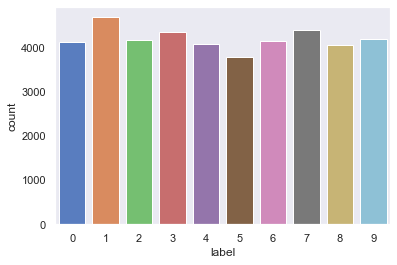

In [5]:
Y_train = train['label']

#Dropping Label Column
X_train = train.drop(labels=['label'],axis=1)
del train

graph = sns.countplot(Y_train)
 
Y_train.value_counts()

In [6]:
#Checking for any null or missing values
X_train.isnull().any().describe()

test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

### Normalisation


In [7]:
X_train = X_train/255
test = test/255

In [8]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

### Label Encoding


In [9]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)


### Train and Validation Data Split



In [10]:
#Spliting Train and test set
random_seed =2

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,
                                                random_state = random_seed)

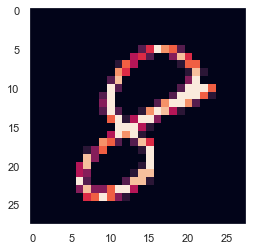

In [11]:
g = plt.imshow(X_train[0][:,:,0])

## Model Building

In [12]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> 
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

In [13]:
#Defining Optimizer

optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [14]:
#Compiling Model

model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])

In [15]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [20]:
epochs=10
batch_size = 112

### Data Augmentation


In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

##  Model Fitting


In [22]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available")
else: 
    print("CUDA not Available.")

CUDA Available


In [23]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/10


C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_3748\923181679.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


337/337 - 124s - loss: 0.1217 - accuracy: 0.9622 - val_loss: 0.0468 - val_accuracy: 0.9879 - lr: 0.0010 - 124s/epoch - 367ms/step
Epoch 2/10
337/337 - 108s - loss: 0.0833 - accuracy: 0.9747 - val_loss: 0.0385 - val_accuracy: 0.9890 - lr: 0.0010 - 108s/epoch - 320ms/step
Epoch 3/10
337/337 - 105s - loss: 0.0703 - accuracy: 0.9793 - val_loss: 0.0366 - val_accuracy: 0.9895 - lr: 0.0010 - 105s/epoch - 310ms/step
Epoch 4/10
337/337 - 103s - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.0378 - val_accuracy: 0.9883 - lr: 0.0010 - 103s/epoch - 305ms/step
Epoch 5/10
337/337 - 107s - loss: 0.0560 - accuracy: 0.9834 - val_loss: 0.0345 - val_accuracy: 0.9900 - lr: 0.0010 - 107s/epoch - 319ms/step
Epoch 6/10
337/337 - 129s - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0281 - val_accuracy: 0.9921 - lr: 0.0010 - 129s/epoch - 383ms/step
Epoch 7/10
337/337 - 127s - loss: 0.0461 - accuracy: 0.9864 - val_loss: 0.0233 - val_accuracy: 0.9926 - lr: 0.0010 - 127s/epoch - 377ms/step
Epoch 8/10
337/337 - 129

##  Analyzing the model
We can analyse the model using various methods. One of them, is learning graph. Here we plot the losses of both training and validation data in a plot and evaluate it by looking at the trend. For a ideal model, training and validation loss should be low and similar. 

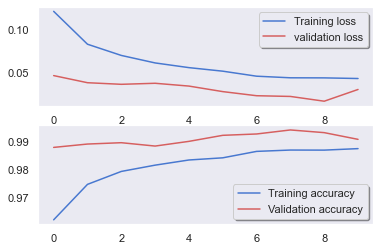

In [24]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Confusion Matrix Plotting


132/132 [==============================] - 2s 15ms/step


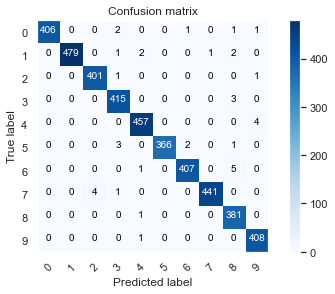

In [25]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 